<a href="https://colab.research.google.com/github/Janya-Sharma-22/-algo-efficiency-mini-project-JanyaSharma/blob/main/Task03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
# Memory profiler is not pre-installed in Colab
!pip install memory_profiler

In [84]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

In [85]:
def measure_memory(func, *args):
    mem_usage = memory_usage((func, args), max_iterations=1, retval=True, interval=0.01)
    if isinstance(mem_usage, tuple):
        mem, _ = mem_usage
        return max(mem)
    return max(mem_usage)

def measure_memory(func, *args):
    baseline = memory_usage(-1, interval=0.01, timeout=0.1)
    mem_usage = memory_usage((func, args), max_iterations=1, interval=0.01)
    return max(mem_usage) - min(baseline)

#fib_dp_mem = [measure_memory(fib_dp, n)*1000 for n in fib_inputs]  # KiB

In [86]:
# Measure execution time
def measure_time(func, *args):
    start = time.time()
    func(*args)
    end = time.time()
    return end - start

# Measure memory usage
def measure_memory(func, *args):
    mem_usage = memory_usage((func, args), max_iterations=1)
    return max(mem_usage) - min(mem_usage)

# Graph plotting utility
def plot_graph(inputs, results, labels, title, xlabel="Input Size", ylabel="Time (s)"):
    for i, res in enumerate(results):
        plt.plot(inputs, res, marker="o", label=labels[i])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [87]:
# --- Fibonacci ---
def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

def fib_dp(n):
    if n <= 1:
        return n
    dp = [0, 1]
    for i in range(2, n+1):
        dp.append(dp[-1] + dp[-2])
    return dp[n]

# --- Sorting ---
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

def bubble_sort(arr):
    n = len(arr)
    for i in range(n-1):
        for j in range(n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# --- Binary Search ---
def binary_search(arr, x):
    low, high = 0, len(arr)-1
    while low <= high:
        mid = (low+high)//2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            low = mid+1
        else:
            high = mid-1
    return -1

In [88]:
# Inputs
fib_inputs = [5, 10, 20, 25, 30]
sort_inputs = [100, 200, 400, 600, 800]
bs_inputs = [100, 500, 1000, 5000, 10000, 20000]

def random_array(n):
    return [random.randint(0, 1000) for _ in range(n)]

#fib_dp_mem = [measure_memory(fib_dp, n)*1000 for n in fib_inputs]  # KiB

# --- Fibonacci ---
fib_recursive_times = [measure_time(fib_recursive, n) for n in fib_inputs]
fib_dp_times = [measure_time(fib_dp, n) for n in fib_inputs]
fib_recursive_mem = [measure_memory(fib_recursive, n) for n in fib_inputs]
fib_dp_mem = [measure_memory(fib_dp, n) for n in fib_inputs]

# --- Sorting ---
merge_times = [measure_time(merge_sort, random_array(n)) for n in sort_inputs]
quick_times = [measure_time(quick_sort, random_array(n)) for n in sort_inputs]
insert_times = [measure_time(insertion_sort, random_array(n)) for n in sort_inputs]
bubble_times = [measure_time(bubble_sort, random_array(n)) for n in sort_inputs]
selection_times = [measure_time(selection_sort, random_array(n)) for n in sort_inputs]

merge_mem = [measure_memory(merge_sort, random_array(n)) for n in sort_inputs]
quick_mem = [measure_memory(quick_sort, random_array(n)) for n in sort_inputs]
insert_mem = [measure_memory(insertion_sort, random_array(n)) for n in sort_inputs]
bubble_mem = [measure_memory(bubble_sort, random_array(n)) for n in sort_inputs]
selection_mem = [measure_memory(selection_sort, random_array(n)) for n in sort_inputs]

# --- Binary Search ---
binary_search_times = []
binary_search_mem = []
for n in bs_inputs:
    arr = list(range(n))
    x = random.randint(0, n-1)
    binary_search_times.append(measure_time(binary_search, arr, x))
    binary_search_mem.append(measure_memory(binary_search, arr, x))

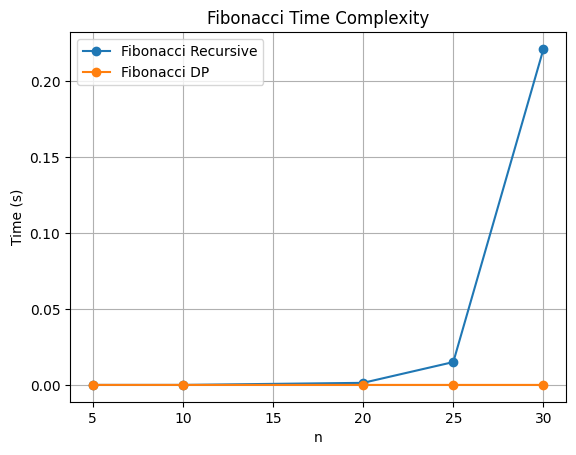

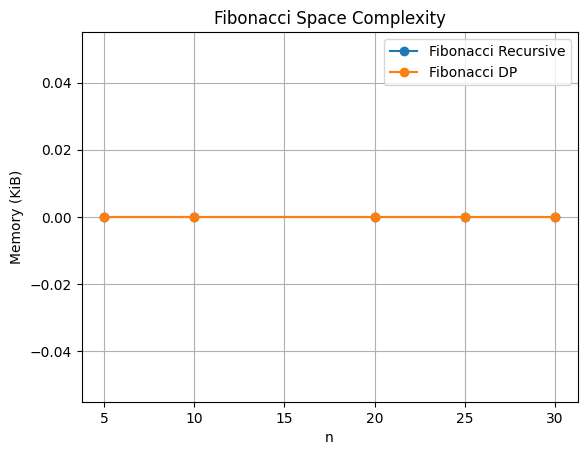

In [89]:
plot_graph(fib_inputs, [fib_recursive_times, fib_dp_times],
           ["Fibonacci Recursive", "Fibonacci DP"],
           "Fibonacci Time Complexity", xlabel="n", ylabel="Time (s)")

plot_graph(fib_inputs, [fib_recursive_mem, fib_dp_mem],
           ["Fibonacci Recursive", "Fibonacci DP"],
           "Fibonacci Space Complexity", xlabel="n", ylabel="Memory (KiB)")

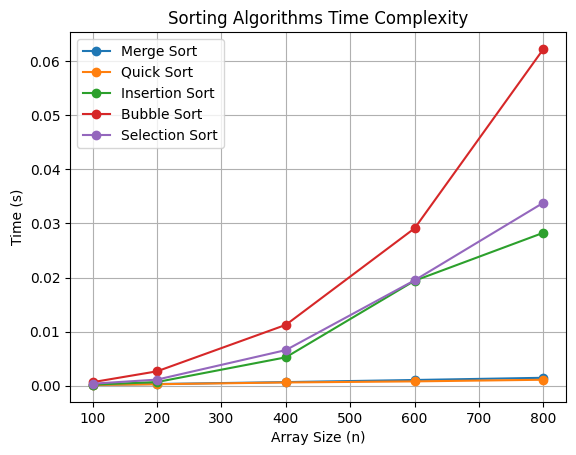

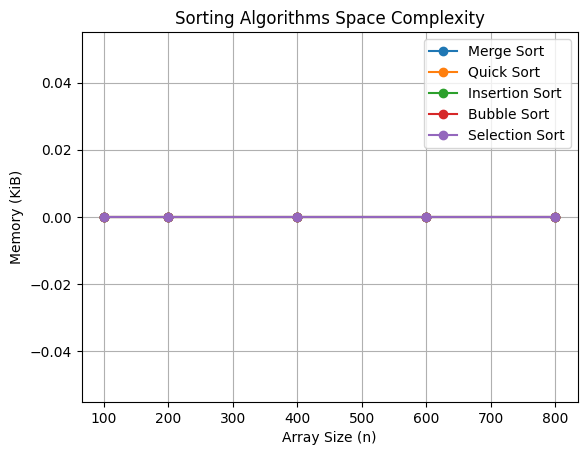

In [90]:
plot_graph(sort_inputs,
           [merge_times, quick_times, insert_times, bubble_times, selection_times],
           ["Merge Sort", "Quick Sort", "Insertion Sort", "Bubble Sort", "Selection Sort"],
           "Sorting Algorithms Time Complexity", xlabel="Array Size (n)", ylabel="Time (s)")

plot_graph(sort_inputs,
           [merge_mem, quick_mem, insert_mem, bubble_mem, selection_mem],
           ["Merge Sort", "Quick Sort", "Insertion Sort", "Bubble Sort", "Selection Sort"],
           "Sorting Algorithms Space Complexity", xlabel="Array Size (n)", ylabel="Memory (KiB)")

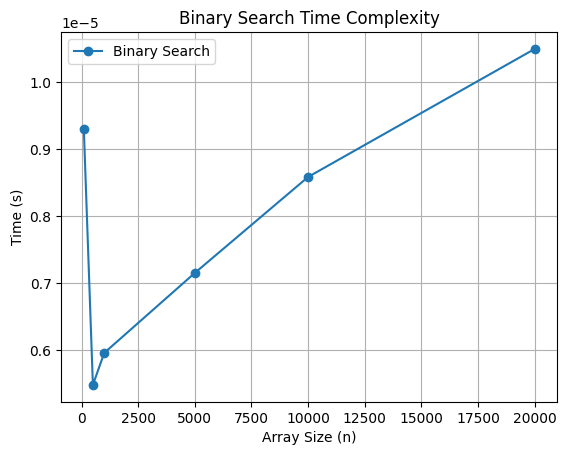

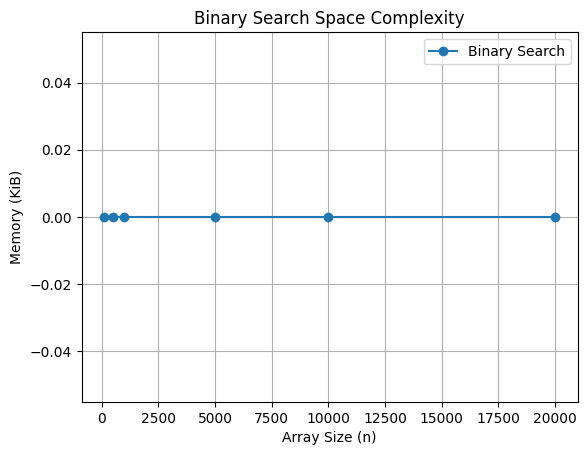

In [91]:
plot_graph(bs_inputs, [binary_search_times],
           ["Binary Search"],
           "Binary Search Time Complexity", xlabel="Array Size (n)", ylabel="Time (s)")

plot_graph(bs_inputs, [binary_search_mem],
           ["Binary Search"],
           "Binary Search Space Complexity", xlabel="Array Size (n)", ylabel="Memory (KiB)")

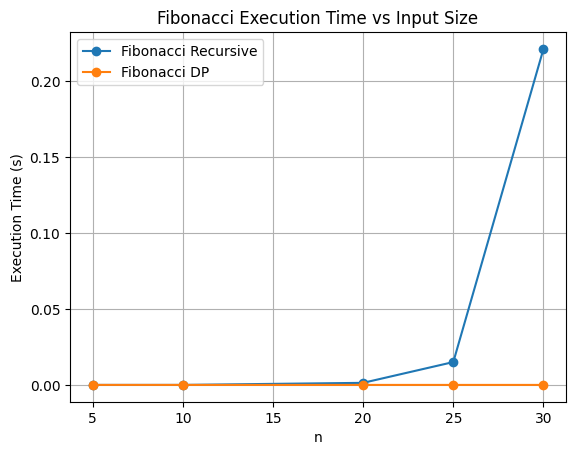

In [92]:
plot_graph(fib_inputs, [fib_recursive_times, fib_dp_times],
           ["Fibonacci Recursive", "Fibonacci DP"],
           "Fibonacci Execution Time vs Input Size",
           xlabel="n", ylabel="Execution Time (s)")

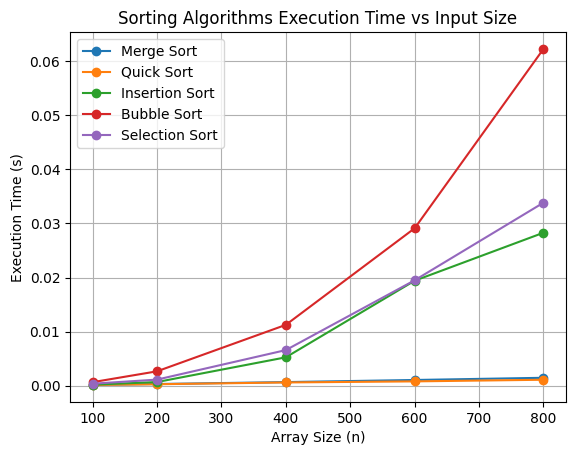

In [93]:
plot_graph(sort_inputs,
           [merge_times, quick_times, insert_times, bubble_times, selection_times],
           ["Merge Sort", "Quick Sort", "Insertion Sort", "Bubble Sort", "Selection Sort"],
           "Sorting Algorithms Execution Time vs Input Size",
           xlabel="Array Size (n)", ylabel="Execution Time (s)")

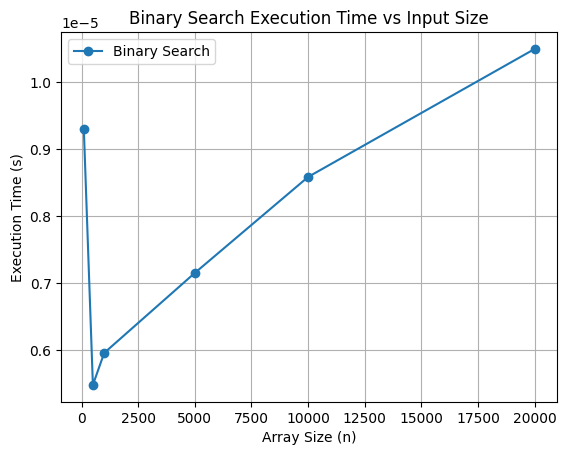

In [94]:
plot_graph(bs_inputs, [binary_search_times],
           ["Binary Search"],
           "Binary Search Execution Time vs Input Size",
           xlabel="Array Size (n)", ylabel="Execution Time (s)")